In [1]:
from pykat import finesse        
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
from matplotlib.ticker import FormatStrFormatter

                                              ..-
    PyKat 1.2.73          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
base = finesse.kat()
base.verbose = False

In [3]:
Mich ="""
l laser1 1.0 0 n1 # laser with P = 1W
s s1 0 n1 n2
bs bs1 0.5 0.5 0 0 n2 n3 n4 n5 # 50:50 beam splitter
s Lx 1 n4 n8
s Ly 1 n3 n6
m ETMy 1 0 0 n6 n7
m ETMx 1 0 0 n8 n9
pd pow_out n5
"""


In [4]:
base.parse(Mich)

In [5]:
kat = base.deepcopy()
kat.parse("xaxis ETMx phi lin 0 180 200")
out1=kat.run()

In [6]:
kat.bs1.phi=45 
out2 = kat.run()

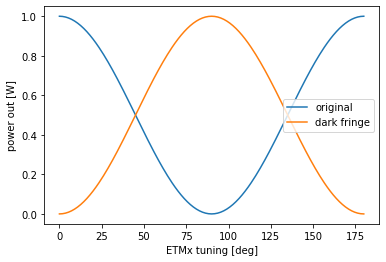

In [7]:
plt.figure()
plt.plot(out1.x,out1['pow_out'],label='original')
plt.plot(out2.x,out2['pow_out'],label='dark fringe')
plt.xlabel('ETMx tuning [deg]')
plt.ylabel('power out [W]')
plt.legend(loc=5)